In [1]:
# To be able to make edits to repo without having to restart notebook
%load_ext autoreload
%autoreload 2

In [3]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, mannwhitneyu, wilcoxon, ttest_rel, ttest_ind
import seaborn as sns
from matplotlib.patches import FancyArrowPatch
from matplotlib.colors import ColorConverter

remap_path = os.getcwd()
prototype_path = os.path.abspath(os.path.join(remap_path, os.pardir))
project_path = os.path.abspath(os.path.join(prototype_path, os.pardir))
lab_path = os.path.abspath(os.path.join(project_path, os.pardir))
sys.path.append(lab_path)
# os.chdir(project_path)
# sys.path.append(project_path)
# print(project_path)

In [4]:
from _prototypes.cell_remapping.src.MEC_naming import MEC_naming_format, extract_name_mec

In [54]:
# csv path
# remapping_csv_path = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\full_32_permute.xlsx"

reg_csv = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\GusData\corrected_csvs\regular_merge_corrected_combined.xlsx"
# # reg_csv = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\GusData\norm_pos_and_fr_csvs\regular_unnorm_pos_combined.xlsx"
# temp_csv = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\GusData\corrected_csvs\temporal_merge_corrected_combined.xlsx"
temp_csv = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\GusData\corrected_csvs\temporal_corrected_combined2.xlsx"

# sd_csv = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\GusData\norm_pos_and_fr_csvs\filtered_any_ses_greater.xlsx"


regular_df = pd.read_excel(reg_csv)
temporal_df = pd.read_excel(temp_csv)
# sd_df = pd.read_excel(sd_csv)

# sort by 'signature' column
# regular_df = regular_df.sort_values(by=['signature', 'name', 'depth', 'date', 'tetrode', 'unit_id'])
# temporal_df = temporal_df.sort_values(by=['signature', 'name', 'depth', 'date', 'tetrode', 'unit_id'])
# print(temporal_df['emd'].head())
# print(regular_df['unit_id'].head())

temporal_df_valid_columns = ['signature', 'name', 'depth', 'date', 'tetrode', 'unit_id', 'emd', 'emd_z', 'emd_quantile', 'emd_mean', 'emd_std']
sd_df_drop_columns = ['whole_wass', 'z_score', 'base_mean', 'base_std', 'median', 'mad', 'quantile', 'plower',
                       'phigher', 'ptwotail', 'sd_wass', 'sd_z_score', 'sd_quantile', 'sd_base_mean',
                        'sd_base_std', 'sd_median', 'sd_mad']
# sd_df_valid_columns = ['sd_wass', 'sd_z_score', 'sd_quantile', 'sd_base_mean', 'sd_base_std', 'sd_median', 'sd_mad']
# sd_df_drop_columns = ['sd_wass', 'sd_z_score', 'sd_quantile', 'sd_base_mean', 'sd_base_std', 'sd_median', 'sd_mad']
temporal_df_copy = temporal_df.copy()
# sd_df = sd_df.drop(columns=sd_df_drop_columns)
# sd_df = sd_df.sort_values(by=['signature'])
# sd_df = sd_df[['name','tetrode']]
temporal_df = temporal_df[temporal_df_valid_columns]
# # sd_df = sd_df[sd_df_valid_columns]
# regular_df = regular_df[sd_df_drop_columns]

regular_df = regular_df.sort_values(by=['signature', 'name', 'depth', 'date', 'tetrode', 'unit_id'], ignore_index=True)
temporal_df = temporal_df.sort_values(by=['signature', 'name', 'depth', 'date', 'tetrode', 'unit_id'], ignore_index=True)
# print(regular_df['unit_id'].head())
# print(temporal_df['unit_id'].head())
# print(temporal_df['emd'].head())
# temporal_df = temporal_df[temporal_df_valid_columns]
# print(temporal_df['emd'].head())
# print(temporal_df_copy['emd'].head())
# print(temporal_df_copy['unit_id'].head())
# print(regular_df['unit_id'].head())

# reset index
regular_df = regular_df.reset_index(drop=True)
temporal_df = temporal_df.reset_index(drop=True)
# print(temporal_df['emd'].head())

# sd_df = sd_df.reset_index(drop=True)

# horizontal concatenation
# remapping_df = pd.concat([regular_df, sd_df], axis=1)
# remapping_df = pd.concat([regular_df, temporal_df], axis=1)
# remapping_df = pd.concat([regular_df, temporal_df, sd_df], axis=1)
# remapping_df = pd.concat([sd_df, regular_df], axis=1)

# regular_df = regular_df.sort_values(by=['signature'])
# temporal_df = temporal_df.sort_values(by=['signature'])
# concatenate and drop duplicates based on ['signature', 'name', 'depth', 'date', 'tetrode', 'unit_id'] columns
remapping_df = pd.concat([regular_df, temporal_df], axis=1)
remapping_df = remapping_df.loc[:, ~remapping_df.columns.duplicated()]
remapping_df = remapping_df.drop_duplicates(subset=['signature', 'name', 'depth', 'date', 'tetrode', 'unit_id'], keep='first')

# remapping_df = pd.concat([regular_df, temporal_df], axis=1)


# load csv
# remapping_df = pd.read_excel(remapping_csv_path)

# csv path
# shuffle_spatial_path = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\MEC_spatial_shuffles_combined_new.xlsx"
# shuffle_spatial_path = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\GusData\corrected_csvs_no_speed_filter\shuffles_with_border_grid_combined.xlsx"
# shuffle_spatial_path = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\GusData\corrected_csvs\shuffles_corrected_combined.xlsx"
shuffle_spatial_path = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\GusData\shuffles_grid_fixed_combined.xlsx"


# load csv
shuffle_spatial_df = pd.read_excel(shuffle_spatial_path)

In [55]:
remapping_df['signature'].head()

0    ['1-13_20210510-17-50x50cm-1200um-Test1', '1-1...
1    ['1-13_20210510-17-50x50cm-1200um-Test1', '1-1...
2    ['1-13_20210510-17-50x50cm-1200um-Test1', '1-1...
3    ['1-13_20210510-17-50x50cm-1200um-Test1', '1-1...
4    ['1-13_20210510-17-50x50cm-1200um-Test1', '1-1...
Name: signature, dtype: object

In [56]:
temporal_df_copy['signature'].head()

0    ['1-28_20220119-14-50x50cm-1050um-Test1', '1-2...
1    ['1-28_20220119-14-50x50cm-1050um-Test2', '1-2...
2    ['1-28_20220120-15-50x50cm-1050um-Test3', '1-2...
3    ['1-28_20220119-14-50x50cm-1050um-Test1', '1-2...
4    ['1-28_20220119-14-50x50cm-1050um-Test2', '1-2...
Name: signature, dtype: object

In [57]:
regular_df.columns

Index(['signature', 'depth', 'name', 'date', 'tetrode', 'unit_id',
       'session_ids', 'whole_wass', 'z_score', 'base_mean', 'base_std',
       'mod_z_score', 'median', 'mad', 'quantile', 'plower', 'phigher',
       'ptwotail', 'fr', 'fr_ratio', 'fr_change', 'fr_ratio_z', 'fr_ratio_q',
       'fr_ratio_mean', 'fr_ratio_std', 'fr_change_z', 'fr_change_q',
       'fr_change_mean', 'fr_change_std', 'spike_count', 'sd_wass',
       'sd_z_score', 'sd_quantile', 'sd_base_mean', 'sd_base_std', 'sd_median',
       'sd_mad', 'n_repeats', 'arena_size', 'cylinder', 'ratemap_dims',
       'downsample_factor'],
      dtype='object')

In [ ]:
# shuffle_spatial_df['p_value_information'] = 1 - shuffle_spatial_df['p_value_information']
# shuffle_spatial_df['p_value_sparsity'] = 1 - shuffle_spatial_df['p_value_sparsity']
# shuffle_spatial_df['p_value_selectivity'] = 1 - shuffle_spatial_df['p_value_selectivity']
# shuffle_spatial_df['p_value_coherence'] = 1 - shuffle_spatial_df['p_value_coherence']


In [58]:
# Need to match neurofunc and remapping
import re
from scripts.batch_map.LEC_naming import LEC_naming_format, extract_name_lec

def _check_single_format(filename, fformat, fxn):
    if re.match(str(fformat), str(filename)) is not None:
        return list(fxn(filename))

# For neurofunc need to add extract, date, depth, name, stim 
# iterate thru rows of shuffle_spatial_df and extract from signature
for i, row in shuffle_spatial_df.iterrows():
    # extract
    fname = row['Session']
    name = extract_name_mec(fname)
    formats = MEC_naming_format
    for fformat in list(formats.keys()):
        checked = _check_single_format(fname, fformat, formats[fformat])
        if checked is not None:
            break
    stim, depth, name, date = checked
    
    shuffle_spatial_df.at[i, 'date'] = date
    shuffle_spatial_df.at[i, 'depth'] = depth
    shuffle_spatial_df.at[i, 'name'] = name
    shuffle_spatial_df.at[i, 'stim'] = stim


1-14_20210419-7-50x50cm-1050um-Test1
None 1050um 1-14 20210419
1-14_20210419-7-50x50cm-1050um-Test1
None 1050um 1-14 20210419
1-14_20210419-7-50x50cm-1050um-Test1
None 1050um 1-14 20210419
1-14_20210419-7-50x50cm-1050um-Test1
None 1050um 1-14 20210419
1-14_20210419-7-50x50cm-1050um-Test1
None 1050um 1-14 20210419
1-14_20210419-7-50x50cm-1050um-Test1
None 1050um 1-14 20210419
1-14_20210419-7-50x50cm-1050um-Test1
None 1050um 1-14 20210419
1-14_20210419-7-50x50cm-1050um-Test1
None 1050um 1-14 20210419
1-14_20210419-7-50x50cm-1050um-Test2
None 1050um 1-14 20210419
1-14_20210419-7-50x50cm-1050um-Test2
None 1050um 1-14 20210419
1-14_20210419-7-50x50cm-1050um-Test2
None 1050um 1-14 20210419
1-14_20210419-7-50x50cm-1050um-Test2
None 1050um 1-14 20210419
1-14_20210419-7-50x50cm-1050um-Test2
None 1050um 1-14 20210419
1-14_20210419-7-50x50cm-1050um-Test2
None 1050um 1-14 20210419
1-14_20210419-7-50x50cm-1050um-Test2
None 1050um 1-14 20210419
1-14_20210419-7-50x50cm-1050um-Test2
None 1050um 1-14 2

C:\Users\aaoun\AppData\Local\Temp\ipykernel_20400\1927536238.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '20210419' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  shuffle_spatial_df.at[i, 'date'] = date


In [59]:
import pandas as pd

# Define the common columns
neurofunc_row_identifiers = ['name', 'Tetrode', 'Cell ID']
remapping_row_identifiers = ['name', 'tetrode', 'unit_id']

for row in neurofunc_row_identifiers:
    shuffle_spatial_df[row] = shuffle_spatial_df[row].astype(str)
for row in remapping_row_identifiers:
    remapping_df[row] = remapping_df[row].astype(str)
shuffle_spatial_df['Session'] = shuffle_spatial_df['Session'].astype(str)
remapping_df['signature'] = remapping_df['signature'].astype(str)


In [60]:
remapping_df.columns

Index(['signature', 'depth', 'name', 'date', 'tetrode', 'unit_id',
       'session_ids', 'whole_wass', 'z_score', 'base_mean', 'base_std',
       'mod_z_score', 'median', 'mad', 'quantile', 'plower', 'phigher',
       'ptwotail', 'fr', 'fr_ratio', 'fr_change', 'fr_ratio_z', 'fr_ratio_q',
       'fr_ratio_mean', 'fr_ratio_std', 'fr_change_z', 'fr_change_q',
       'fr_change_mean', 'fr_change_std', 'spike_count', 'sd_wass',
       'sd_z_score', 'sd_quantile', 'sd_base_mean', 'sd_base_std', 'sd_median',
       'sd_mad', 'n_repeats', 'arena_size', 'cylinder', 'ratemap_dims',
       'downsample_factor', 'emd', 'emd_z', 'emd_quantile', 'emd_mean',
       'emd_std'],
      dtype='object')

In [ ]:

# # Create an empty list to store the merged rows
# merged_rows = []

# # Iterate through each row in remapping_df
# counter = 0
# for remapping_row in remapping_df.itertuples(index=False):
#     # Extract the identifiers from the remapping row
#     remapping_identifiers = [getattr(remapping_row, col) for col in remapping_row_identifiers]

#     # Find the matching row in shuffle_spatial_df based on the identifiers
#     matching_row = shuffle_spatial_df.loc[
#         (shuffle_spatial_df[neurofunc_row_identifiers] == remapping_identifiers).all(axis=1)
#     ]

#     # Check if a matching row was found
#     if len(matching_row) == 0:
#         print("Found {} matching rows for {}".format(len(matching_row), remapping_identifiers))
#         print(matching_row['Session'], getattr(remapping_row, 'signature'))
#         # stop()
#     elif len(matching_row) > 1:
#         # check all rows are matching on spatial info score 
#         print(matching_row)
#         prev = None
#         for i, row in matching_row.iterrows():
#             if prev is None:
#                 prev = row['spike_count']
#             else:
#                 if prev != row['spike_count']:
#                     print('multiple matches')
#                     print(matching_row)
#                     # stop()
        
#     # Join the matching rows
#     # merged_row = pd.concat([matching_row, pd.DataFrame([remapping_row], columns=remapping_df.columns)], axis=1)
#     merged_rows.append(matching_row)
#     counter += 1

#     if len(merged_rows) != counter:
#         print('error {} != {}'.format(len(merged_rows), counter))
#         print(matching_row)


# # Create the merged dataframe
# merged_df = pd.concat(merged_rows, ignore_index=True)

# # Print the merged dataframe
# # print(merged_df)


In [ ]:
# shuffle_spatial_df['isSpatial'] = 0
# spatial_filtered = shuffle_spatial_df.loc[shuffle_spatial_df['p_value_information'] < 0.05]
# spatial_identifiers = spatial_filtered.groupby(neurofunc_row_identifiers).count().reset_index()[neurofunc_row_identifiers]
# for i, row in spatial_identifiers.iterrows():
#     matching_rows = remapping_df[remapping_row_identifiers].eq(row[neurofunc_row_identifiers]).all(axis=1)
#     remapping_df.loc[matching_rows, 'isSpatial'] = 1

# shuffle_spatial_df['isSparse'] = 0
# sparsity_filtered = shuffle_spatial_df.loc[shuffle_spatial_df['p_value_sparsity'] < 0.05]
# sparsity_identifiers = sparsity_filtered.groupby(neurofunc_row_identifiers).count().reset_index()[neurofunc_row_identifiers]
# for i, row in sparsity_identifiers.iterrows():
#     matching_rows = remapping_df[remapping_row_identifiers].eq(row[neurofunc_row_identifiers]).all(axis=1)
#     remapping_df.loc[matching_rows, 'isSparse'] = 1

# shuffle_spatial_df['isSelective'] = 0
# selectivity_filtered = shuffle_spatial_df.loc[shuffle_spatial_df['p_value_selectivity'] < 0.05]
# selectivity_identifiers = selectivity_filtered.groupby(neurofunc_row_identifiers).count().reset_index()[neurofunc_row_identifiers]
# for i, row in selectivity_identifiers.iterrows():
#     matching_rows = remapping_df[remapping_row_identifiers].eq(row[neurofunc_row_identifiers]).all(axis=1)
#     remapping_df.loc[matching_rows, 'isSelective'] = 1

# shuffle_spatial_df['isCoherent'] = 0
# coherence_filtered = shuffle_spatial_df.loc[shuffle_spatial_df['p_value_coherence'] < 0.05]
# coherence_identifiers = coherence_filtered.groupby(neurofunc_row_identifiers).count().reset_index()[neurofunc_row_identifiers]
# for i, row in coherence_identifiers.iterrows():
#     matching_rows = remapping_df[remapping_row_identifiers].eq(row[neurofunc_row_identifiers]).all(axis=1)
#     remapping_df.loc[matching_rows, 'isCoherent'] = 1


In [61]:
remapping_df.columns

Index(['signature', 'depth', 'name', 'date', 'tetrode', 'unit_id',
       'session_ids', 'whole_wass', 'z_score', 'base_mean', 'base_std',
       'mod_z_score', 'median', 'mad', 'quantile', 'plower', 'phigher',
       'ptwotail', 'fr', 'fr_ratio', 'fr_change', 'fr_ratio_z', 'fr_ratio_q',
       'fr_ratio_mean', 'fr_ratio_std', 'fr_change_z', 'fr_change_q',
       'fr_change_mean', 'fr_change_std', 'spike_count', 'sd_wass',
       'sd_z_score', 'sd_quantile', 'sd_base_mean', 'sd_base_std', 'sd_median',
       'sd_mad', 'n_repeats', 'arena_size', 'cylinder', 'ratemap_dims',
       'downsample_factor', 'emd', 'emd_z', 'emd_quantile', 'emd_mean',
       'emd_std'],
      dtype='object')

In [63]:
ses_id_dict = {}
unq_names = shuffle_spatial_df['name'].unique()
unq_name_counts = {x:1 for x in unq_names}
for ses_id in np.sort(shuffle_spatial_df['Session'].unique()):
    nme = ses_id.split('_')[0]
    ses_id_dict[ses_id] = 'session_' + str(unq_name_counts[nme])
    unq_name_counts[nme] += 1

shuffle_spatial_df['session_id'] = ''
shuffle_spatial_df['group'] = ''

for i in range(len(shuffle_spatial_df)):
    shuffle_spatial_df.loc[i,'session_id'] = ses_id_dict[shuffle_spatial_df.iloc[i]['Session']]

app_ki = ['1-13', '1-14', '1a27', '1-30', '1a35', '1a37', '1-16']
control = ['1-20', '1-24', '1-25', '1-28', '1-34', '1a23', '1a40', '1a21']

for i in range(len(remapping_df)):
    nme = remapping_df.iloc[i]['name']
    # nme = 
    # print(i)
    if nme in control:
        remapping_df.loc[i,'group'] = 'control'
    else:
        # print(nme)
        assert nme in app_ki
        remapping_df.loc[i,'group'] = 'app_ki'
    ses1 = eval(remapping_df.iloc[i]['session_ids'])[0]
    ses2 = eval(remapping_df.iloc[i]['session_ids'])[1]

    ses1_match = shuffle_spatial_df.loc[(shuffle_spatial_df['session_id'] == ses1) & (shuffle_spatial_df['name'] == remapping_df.iloc[i]['name']) & (shuffle_spatial_df['Tetrode'] == remapping_df.iloc[i]['tetrode']) & (shuffle_spatial_df['Cell ID'] == remapping_df.iloc[i]['unit_id'])]
    ses2_match = shuffle_spatial_df.loc[(shuffle_spatial_df['session_id'] == ses2) & (shuffle_spatial_df['name'] == remapping_df.iloc[i]['name']) & (shuffle_spatial_df['Tetrode'] == remapping_df.iloc[i]['tetrode']) & (shuffle_spatial_df['Cell ID'] == remapping_df.iloc[i]['unit_id'])]

    assert len(ses1_match) == 1, 'ses1_match: {}'.format(len(ses1_match))
    assert len(ses2_match) == 1, 'ses2_match: {}'.format(len(ses2_match))

    for ky in ['information', 'sparsity', 'selectivity', 'coherence']:
        score_origin_session = ses1_match.iloc[0][ky]
        score_target_session = ses2_match.iloc[0][ky]
        remapping_df.loc[i, ky + '_origin_session'] = score_origin_session
        remapping_df.loc[i, ky + '_target_session'] = score_target_session

        shuffled_score_mean_origin_session = ses1_match.iloc[0]['shuffled_' + ky + '_mean']
        shuffled_score_mean_target_session = ses2_match.iloc[0]['shuffled_' + ky + '_mean']
        remapping_df.loc[i, ky + '_reference_mean_origin_session'] = shuffled_score_mean_origin_session
        remapping_df.loc[i, ky + '_reference_mean_target_session'] = shuffled_score_mean_target_session

        shuffled_score_sd_origin_session = ses1_match.iloc[0]['shuffled_' + ky + '_std']
        shuffled_score_sd_target_session = ses2_match.iloc[0]['shuffled_' + ky + '_std']
        remapping_df.loc[i, ky + '_reference_sd_origin_session'] = shuffled_score_sd_origin_session
        remapping_df.loc[i, ky + '_reference_sd_target_session'] = shuffled_score_sd_target_session

        shuffled_score_p_value_origin_session = ses1_match.iloc[0]['p_value_' + ky]
        shuffled_score_p_value_target_session = ses2_match.iloc[0]['p_value_' + ky]
        remapping_df.loc[i, ky + '_quantile_origin_session'] = shuffled_score_p_value_origin_session
        remapping_df.loc[i, ky + '_quantile_target_session'] = shuffled_score_p_value_target_session

    

In [64]:
remapping_df.keys()

Index(['signature', 'depth', 'name', 'date', 'tetrode', 'unit_id',
       'session_ids', 'whole_wass', 'z_score', 'base_mean', 'base_std',
       'mod_z_score', 'median', 'mad', 'quantile', 'plower', 'phigher',
       'ptwotail', 'fr', 'fr_ratio', 'fr_change', 'fr_ratio_z', 'fr_ratio_q',
       'fr_ratio_mean', 'fr_ratio_std', 'fr_change_z', 'fr_change_q',
       'fr_change_mean', 'fr_change_std', 'spike_count', 'sd_wass',
       'sd_z_score', 'sd_quantile', 'sd_base_mean', 'sd_base_std', 'sd_median',
       'sd_mad', 'n_repeats', 'arena_size', 'cylinder', 'ratemap_dims',
       'downsample_factor', 'emd', 'emd_z', 'emd_quantile', 'emd_mean',
       'emd_std', 'group', 'information_origin_session',
       'information_target_session',
       'information_reference_mean_origin_session',
       'information_reference_mean_target_session',
       'information_reference_sd_origin_session',
       'information_reference_sd_target_session',
       'information_quantile_origin_session',
     

In [ ]:
# # save as csv
# remapping_df.to_excel('remapping_corrected_shuffle_merged.xlsx', index=False)

In [65]:
remapping_df['isSpatial'] = 0

# any session pvalue < 0.05 then cell is spatial
spatial_filtered = shuffle_spatial_df.loc[shuffle_spatial_df['p_value_information'] < 0.05]
spatial_identifiers = spatial_filtered.groupby(neurofunc_row_identifiers).count().reset_index()[neurofunc_row_identifiers]

# only first session pvalue < 0.05 then cell is spatial
# spatial_identifiers = shuffle_spatial_df.groupby(neurofunc_row_identifiers).agg({'p_value_information': 'first'}).reset_index()
# spatial_identifiers = spatial_identifiers.loc[spatial_identifiers['p_value_information'] < 0.05]
for i, row in spatial_identifiers.iterrows():
    si_done = False
    for j, val in remapping_df[remapping_row_identifiers].iterrows():
        if list(row[neurofunc_row_identifiers].to_numpy()) == list(val.to_numpy()):
            remapping_df.loc[j, 'isSpatial'] = 1
            si_done = True
    if si_done == False:
        print('error spatial')

remapping_df['isSparse'] = 0
sparsity_filtered = shuffle_spatial_df.loc[shuffle_spatial_df['p_value_sparsity'] < 0.05]
sparsity_identifiers = sparsity_filtered.groupby(neurofunc_row_identifiers).count().reset_index()[neurofunc_row_identifiers]
# sparsity_identifiers = shuffle_spatial_df.groupby(neurofunc_row_identifiers).agg({'p_value_sparsity': 'first'}).reset_index()
# sparsity_identifiers = sparsity_identifiers.loc[sparsity_identifiers['p_value_sparsity'] < 0.05]
for i, row in sparsity_identifiers.iterrows():
    si_done = False
    for j, val in remapping_df[remapping_row_identifiers].iterrows():
        if list(row[neurofunc_row_identifiers].to_numpy()) == list(val.to_numpy()):
            remapping_df.loc[j, 'isSparse'] = 1
            si_done = True
    if si_done == False:
        print('error sparsity')

remapping_df['isSelective'] = 0
selectivity_filtered = shuffle_spatial_df.loc[shuffle_spatial_df['p_value_selectivity'] < 0.05]
selectivity_identifiers = selectivity_filtered.groupby(neurofunc_row_identifiers).count().reset_index()[neurofunc_row_identifiers]
# selectivity_identifiers = shuffle_spatial_df.groupby(neurofunc_row_identifiers).agg({'p_value_selectivity': 'first'}).reset_index()
# selectivity_identifiers = selectivity_identifiers.loc[selectivity_identifiers['p_value_selectivity'] < 0.05]
for i, row in selectivity_identifiers.iterrows():
    si_done = False
    for j, val in remapping_df[remapping_row_identifiers].iterrows():
        if list(row[neurofunc_row_identifiers].to_numpy()) == list(val.to_numpy()):
            remapping_df.loc[j, 'isSelective'] = 1
            si_done = True
    if si_done == False:
        print('error selectivity')

remapping_df['isCoherent'] = 0
coherence_filtered = shuffle_spatial_df.loc[shuffle_spatial_df['p_value_coherence'] < 0.05]
coherence_identifiers = coherence_filtered.groupby(neurofunc_row_identifiers).count().reset_index()[neurofunc_row_identifiers]
# coherence_identifiers = shuffle_spatial_df.groupby(neurofunc_row_identifiers).agg({'p_value_coherence': 'first'}).reset_index()
# coherence_identifiers = coherence_identifiers.loc[coherence_identifiers['p_value_coherence'] < 0.05]
for i, row in coherence_identifiers.iterrows():
    si_done = False
    for j, val in remapping_df[remapping_row_identifiers].iterrows():
        if list(row[neurofunc_row_identifiers].to_numpy()) == list(val.to_numpy()):
            remapping_df.loc[j, 'isCoherent'] = 1
            si_done = True
    if si_done == False:
        print('error coherence')

remapping_df['isBorderTop'] = 0
border_top_filtered = shuffle_spatial_df.loc[shuffle_spatial_df['p_value_border_score_top'] < 0.05]
border_top_identifiers = border_top_filtered.groupby(neurofunc_row_identifiers).count().reset_index()[neurofunc_row_identifiers]
# border_top_identifiers = shuffle_spatial_df.groupby(neurofunc_row_identifiers).agg({'p_value_border_top': 'first'}).reset_index()
# border_top_identifiers = border_top_identifiers.loc[border_top_identifiers['p_value_border_top'] < 0.05]
for i, row in border_top_identifiers.iterrows():
    si_done = False
    for j, val in remapping_df[remapping_row_identifiers].iterrows():
        if list(row[neurofunc_row_identifiers].to_numpy()) == list(val.to_numpy()):
            remapping_df.loc[j, 'isBorderTop'] = 1
            si_done = True
    if si_done == False:
        print('error border top')

remapping_df['isBorderBottom'] = 0
border_bottom_filtered = shuffle_spatial_df.loc[shuffle_spatial_df['p_value_border_score_bottom'] < 0.05]
border_bottom_identifiers = border_bottom_filtered.groupby(neurofunc_row_identifiers).count().reset_index()[neurofunc_row_identifiers]
# border_bottom_identifiers = shuffle_spatial_df.groupby(neurofunc_row_identifiers).agg({'p_value_border_bottom': 'first'}).reset_index()
# border_bottom_identifiers = border_bottom_identifiers.loc[border_bottom_identifiers['p_value_border_bottom'] < 0.05]
for i, row in border_bottom_identifiers.iterrows():
    si_done = False
    for j, val in remapping_df[remapping_row_identifiers].iterrows():
        if list(row[neurofunc_row_identifiers].to_numpy()) == list(val.to_numpy()):
            remapping_df.loc[j, 'isBorderBottom'] = 1
            si_done = True
    if si_done == False:
        print('error border bottom')

remapping_df['isGrid'] = 0
grid_filtered = shuffle_spatial_df.loc[shuffle_spatial_df['p_value_grid_score'] < 0.05]
grid_identifiers = grid_filtered.groupby(neurofunc_row_identifiers).count().reset_index()[neurofunc_row_identifiers]
# grid_identifiers = shuffle_spatial_df.groupby(neurofunc_row_identifiers).agg({'p_value_grid': 'first'}).reset_index()
# grid_identifiers = grid_identifiers.loc[grid_identifiers['p_value_grid'] < 0.05]
for i, row in grid_identifiers.iterrows():
    si_done = False
    for j, val in remapping_df[remapping_row_identifiers].iterrows():
        if list(row[neurofunc_row_identifiers].to_numpy()) == list(val.to_numpy()):
            remapping_df.loc[j, 'isGrid'] = 1
            si_done = True
    if si_done == False:
        print('error grid')

remapping_df['isBorderLeft'] = 0
border_left_filtered = shuffle_spatial_df.loc[shuffle_spatial_df['p_value_border_score_left'] < 0.05]
border_left_identifiers = border_left_filtered.groupby(neurofunc_row_identifiers).count().reset_index()[neurofunc_row_identifiers]
# border_left_identifiers = shuffle_spatial_df.groupby(neurofunc_row_identifiers).agg({'p_value_border_left': 'first'}).reset_index()
# border_left_identifiers = border_left_identifiers.loc[border_left_identifiers['p_value_border_left'] < 0.05]
for i, row in border_left_identifiers.iterrows():
    si_done = False
    for j, val in remapping_df[remapping_row_identifiers].iterrows():
        if list(row[neurofunc_row_identifiers].to_numpy()) == list(val.to_numpy()):
            remapping_df.loc[j, 'isBorderLeft'] = 1
            si_done = True
    if si_done == False:
        print('error border left')

remapping_df['isBorderRight'] = 0
border_right_filtered = shuffle_spatial_df.loc[shuffle_spatial_df['p_value_border_score_right'] < 0.05]
border_right_identifiers = border_right_filtered.groupby(neurofunc_row_identifiers).count().reset_index()[neurofunc_row_identifiers]
# border_right_identifiers = shuffle_spatial_df.groupby(neurofunc_row_identifiers).agg({'p_value_border_right': 'first'}).reset_index()
# border_right_identifiers = border_right_identifiers.loc[border_right_identifiers['p_value_border_right'] < 0.05]
for i, row in border_right_identifiers.iterrows():
    si_done = False
    for j, val in remapping_df[remapping_row_identifiers].iterrows():
        if list(row[neurofunc_row_identifiers].to_numpy()) == list(val.to_numpy()):
            remapping_df.loc[j, 'isBorderRight'] = 1
            si_done = True
    if si_done == False:
        print('error border right')


In [66]:
remapping_df[['signature','tetrode','unit_id','emd', 'emd_mean']].iloc[:10]

,signature,tetrode,unit_id,emd,emd_mean
0,"['1-13_20210510-17-50x50cm-1200um-Test1', '1-1...",1,1,128.186850,87.86906
1,"['1-13_20210510-17-50x50cm-1200um-Test1', '1-1...",1,2,240.609852,87.86906
2,"['1-13_20210510-17-50x50cm-1200um-Test1', '1-1...",1,3,274.575925,87.86906
3,"['1-13_20210510-17-50x50cm-1200um-Test1', '1-1...",1,4,22.395812,87.86906
4,"['1-13_20210510-17-50x50cm-1200um-Test1', '1-1...",2,1,32.517842,87.86906
5,"['1-13_20210510-17-50x50cm-1200um-Test1', '1-1...",2,2,33.404403,87.86906
6,"['1-13_20210510-17-50x50cm-1200um-Test1', '1-1...",2,3,43.578116,87.86906
7,"['1-13_20210510-17-50x50cm-1200um-Test1', '1-1...",2,4,91.963987,87.86906
8,"['1-13_20210510-17-50x50cm-1200um-Test1', '1-1...",3,1,11.289308,87.86906
9,"['1-13_20210510-17-50x50cm-1200um-Test1', '1-1...",3,2,81.752015,87.86906


In [67]:
temporal_df_copy[['signature','tetrode','unit_id','emd', 'emd_mean']].iloc[:10]

,signature,tetrode,unit_id,emd,emd_mean
0,"['1-28_20220119-14-50x50cm-1050um-Test1', '1-2...",1,1,162.578875,104.504889
1,"['1-28_20220119-14-50x50cm-1050um-Test2', '1-2...",1,1,378.235582,81.138304
2,"['1-28_20220120-15-50x50cm-1050um-Test3', '1-2...",1,1,23.311755,57.917661
3,"['1-28_20220119-14-50x50cm-1050um-Test1', '1-2...",1,2,41.693447,104.504889
4,"['1-28_20220119-14-50x50cm-1050um-Test2', '1-2...",1,2,20.564760,81.138304
5,"['1-28_20220120-15-50x50cm-1050um-Test3', '1-2...",1,2,36.773846,57.917661
6,"['1-28_20220119-14-50x50cm-1050um-Test1', '1-2...",1,3,89.444351,104.504889
7,"['1-28_20220119-14-50x50cm-1050um-Test2', '1-2...",1,3,23.972600,81.138304
8,"['1-28_20220120-15-50x50cm-1050um-Test3', '1-2...",1,3,41.721869,57.917661
9,"['1-28_20220119-14-50x50cm-1050um-Test1', '1-2...",1,4,53.270261,104.504889


In [68]:
# save 
# remapping_df.to_excel('filtered_first_ses_greater.xlsx', index=False)
# remapping_df.to_excel(r'c:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit\gar_corrected_combined_border_grid.xlsx', index=False)
remapping_df.to_excel(r'c:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit\gar_corrected_combined_shuffles_fixed2.xlsx', index=False)

In [69]:
print(len(regular_df), len(sd_df), len(remapping_df))

678 678


c:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\Envs\envPRISM\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


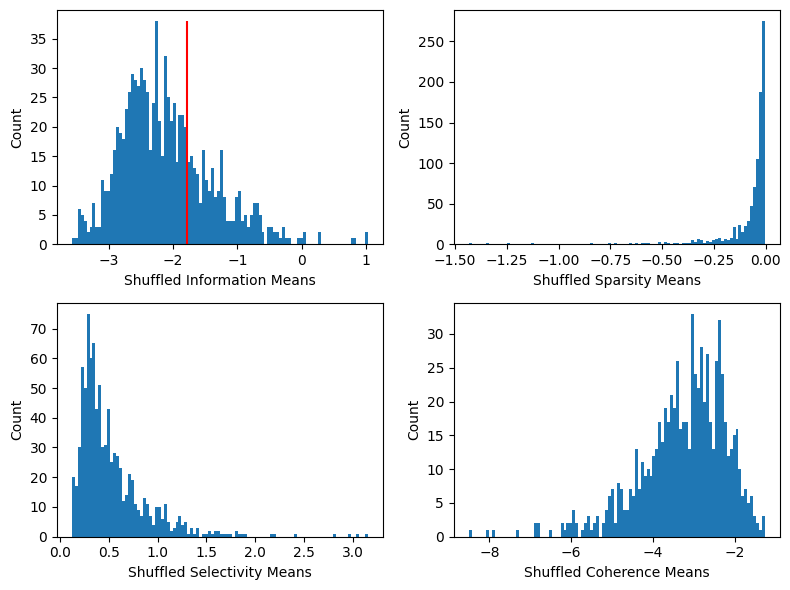

In [16]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(2, 2, 1)
cts = ax.hist(np.log(shuffle_spatial_df['shuffled_information_mean']), bins=100)
ax.vlines(np.log(np.mean(shuffle_spatial_df['shuffled_information_mean'])), 0, np.max(cts[0]),color='r')
ax.set_xlabel('Shuffled Information Means')
ax.set_ylabel('Count')

ax = fig.add_subplot(2, 2, 2)
ax.hist(np.log(shuffle_spatial_df['shuffled_sparsity_mean']), bins=100)
ax.set_xlabel('Shuffled Sparsity Means')
ax.set_ylabel('Count')

ax = fig.add_subplot(2, 2, 3)
ax.hist(np.log(shuffle_spatial_df['shuffled_selectivity_mean']), bins=100)
ax.set_xlabel('Shuffled Selectivity Means')
ax.set_ylabel('Count')

ax = fig.add_subplot(2, 2, 4)
ax.hist(np.log(shuffle_spatial_df['shuffled_coherence_mean']), bins=100)
ax.set_xlabel('Shuffled Coherence Means')
ax.set_ylabel('Count')

fig.tight_layout()
plt.show()

In [14]:
print(remapping_df['isSpatial'].value_counts())
print(remapping_df['isSparse'].value_counts())
print(remapping_df['isSelective'].value_counts())
print(remapping_df['isCoherent'].value_counts())

0    531
1     75
Name: isSpatial, dtype: int64
0    525
1     81
Name: isSparse, dtype: int64
0    537
1     69
Name: isSelective, dtype: int64
0    558
1     48
Name: isCoherent, dtype: int64


In [61]:
print(remapping_df['isSpatial'].value_counts())
print(remapping_df['isSparse'].value_counts())
print(remapping_df['isSelective'].value_counts())
print(remapping_df['isCoherent'].value_counts())

isSpatial
0    594
1     84
Name: count, dtype: int64
isSparse
0    585
1     93
Name: count, dtype: int64
isSelective
0    597
1     81
Name: count, dtype: int64
isCoherent
0    615
1     63
Name: count, dtype: int64
